In [110]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import pickle
from matplotlib.pyplot import figure
from mpl_toolkits import mplot3d
from config import Ising2DTF
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from scipy.stats import randint as sp_randint

from sklearn.neural_network import MLPClassifier

from collections import Counter

In [22]:
M_Data_sq = np.loadtxt("data\Magnetization_data5.txt")
M_Data_hex = np.loadtxt("data\Magnetization_data_hex.txt")
M_Data_tri = np.loadtxt("data\Magnetization_data_tri.txt")

In [38]:
Classifier_Y_sq = np.round(M_Data_sq[:,3])
Y_hex = np.round(M_Data_hex[:,3])
Y_tri = np.round(M_Data_tri[:,3])


X_sq = M_Data_sq[:,0:3]
X_hex = M_Data_hex[:,0:3]
X_tri = M_Data_tri[:,0:3]

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sq, Classifier_Y_sq, test_size=0.2)

In [27]:
model = SVC(kernel = 'linear', gamma = 'auto')
Y_pred = cross_val_predict(model, X_train, Y_train, cv=8)
model.fit(X_train, Y_train)

print("|kernel")
print(metrics.classification_report(Y_train, Y_pred))
print(metrics.confusion_matrix(Y_train, Y_pred))

|kernel
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      4160
         1.0       0.97      0.97      0.97      3840

    accuracy                           0.97      8000
   macro avg       0.97      0.97      0.97      8000
weighted avg       0.97      0.97      0.97      8000

[[4027  133]
 [ 132 3708]]


In [81]:
Y_hex_pred = model.predict(X_hex)
Y_tri_pred = model.predict(X_tri)

print("|kernel")
print(metrics.classification_report(Y_hex, Y_hex_pred))
print(metrics.confusion_matrix(Y_hex, Y_hex_pred))

|kernel
              precision    recall  f1-score   support

         0.0       0.97      0.36      0.53       154
         1.0       0.90      1.00      0.94       846

    accuracy                           0.90      1000
   macro avg       0.93      0.68      0.74      1000
weighted avg       0.91      0.90      0.88      1000

[[ 56  98]
 [  2 844]]


In [82]:

print("|kernel")
print(metrics.classification_report(Y_tri, Y_tri_pred))
print(metrics.confusion_matrix(Y_tri, Y_tri_pred))

|kernel
              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       385
         1.0       1.00      0.74      0.85       615

    accuracy                           0.84      1000
   macro avg       0.85      0.87      0.84      1000
weighted avg       0.89      0.84      0.84      1000

[[385   0]
 [160 455]]


In [98]:
xx = np.linspace(0, 100, 101)
yy = np.linspace(0, 100, 101)
zz = np.linspace(0, 500, 101)
XX, YY, ZZ = np.meshgrid(xx, yy, zz)
xyz = np.vstack([XX.ravel(), YY.ravel(), ZZ.ravel()]).T

XYZ = model.decision_function(xyz)

surf = []

for n, coord in enumerate(xyz):
    if abs(XYZ[n])<0.01:
        surf.append(coord)
        
surfarray1 = np.array(surf)

xx = np.linspace(0, 100, 101)
yy = np.linspace(0, 60, 101)
zz = np.linspace(0, 100, 101)
XX, YY, ZZ = np.meshgrid(xx, yy, zz)
xyz = np.vstack([XX.ravel(), YY.ravel(), ZZ.ravel()]).T

XYZ = model.decision_function(xyz)

surf = []

for n, coord in enumerate(xyz):
    if abs(XYZ[n])<0.01:
        surf.append(coord)
        
surfarray2 = np.array(surf)

In [103]:
X_F = []
X_P = []

for i, p in enumerate(Y_test):
    if p<0.5:
        X_F.append(X_test[i])
    else:
        X_P.append(X_test[i])
        
X_0s = np.array(X_F)
X_1s = np.array(X_P)

X_F_tri = []
X_P_tri = []

for i, p in enumerate(Y_tri):
    if p<0.5:
        X_F_tri.append(X_tri[i])
    else:
        X_P_tri.append(X_tri[i])
        
X_0t = np.array(X_F_tri)
X_1t = np.array(X_P_tri)

X_F_hex = []
X_P_hex = []

for i, p in enumerate(Y_hex):
    if p<0.5:
        X_F_hex.append(X_hex[i])
    else:
        X_P_hex.append(X_hex[i])
        
X_0h = np.array(X_F_hex)
X_1h = np.array(X_P_hex)

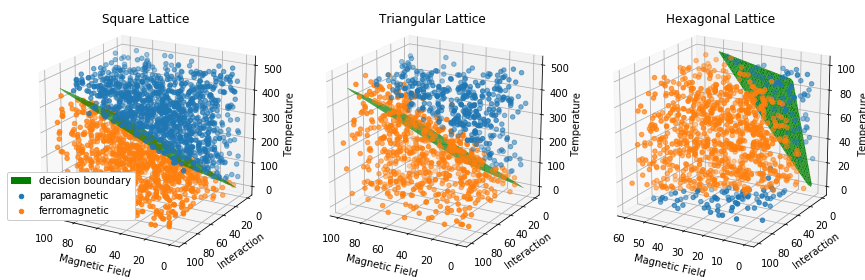

In [136]:
fig = plt.figure(figsize=plt.figaspect(0.33))

ax1 = fig.add_subplot(1, 3, 1, projection='3d')
surf = ax1.plot_trisurf(surfarray1[:,0], surfarray1[:,1], surfarray1[:,2], color = 'green', label = "decision boundary")
surf._facecolors2d=surf._facecolors3d
surf._edgecolors2d=surf._edgecolors3d
ax1.scatter(X_0s[:,0], X_0s[:,1], X_0s[:,2], label = "paramagnetic")
ax1.scatter(X_1s[:,0], X_1s[:,1], X_1s[:,2], label = "ferromagnetic")
ax1.set_title('Square Lattice');
ax1.view_init(20, 120)
ax1.set_xlabel('Magnetic Field')
ax1.set_ylabel('Interaction')
ax1.set_zlabel('Temperature')
ax1.legend(loc=(0,0.2), framealpha = 1)

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
surf = ax2.plot_trisurf(surfarray1[:,0], surfarray1[:,1], surfarray1[:,2], color = 'green', label = "decision boundary")
surf._facecolors2d=surf._facecolors3d
surf._edgecolors2d=surf._edgecolors3d
ax2.scatter(X_0t[:,0], X_0t[:,1], X_0t[:,2], label = "paramagnetic")
ax2.scatter(X_1t[:,0], X_1t[:,1], X_1t[:,2], label = "ferromagnetic")
ax2.set_title('Triangular Lattice');
ax2.view_init(20, 120)
ax2.set_xlabel('Magnetic Field')
ax2.set_ylabel('Interaction')
ax2.set_zlabel('Temperature')
#ax.legend(loc=2)

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
surf = ax3.plot_trisurf(surfarray2[:,0], surfarray2[:,1], surfarray2[:,2], color = 'green', label = "decision boundary")
surf._facecolors2d=surf._facecolors3d
surf._edgecolors2d=surf._edgecolors3d
ax3.scatter(X_0h[:,0], X_0h[:,1], X_0h[:,2], label = "paramagnetic")
ax3.scatter(X_1h[:,0], X_1h[:,1], X_1h[:,2], label = "ferromagnetic")
ax3.set_title('Hexagonal Lattice');
ax3.view_init(20, 120)
ax3.set_xlabel('Magnetic Field')
ax3.set_ylabel('Interaction')
ax3.set_zlabel('Temperature')


fig.tight_layout()
fig.savefig('plots\SVM.png')